<a href="https://colab.research.google.com/github/Nicoflyy/Sistemas-Dinamicos-y-de-control/blob/main/Preguntas_parciales/Pregunta_pr%C3%A1ctica_3er_examen_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


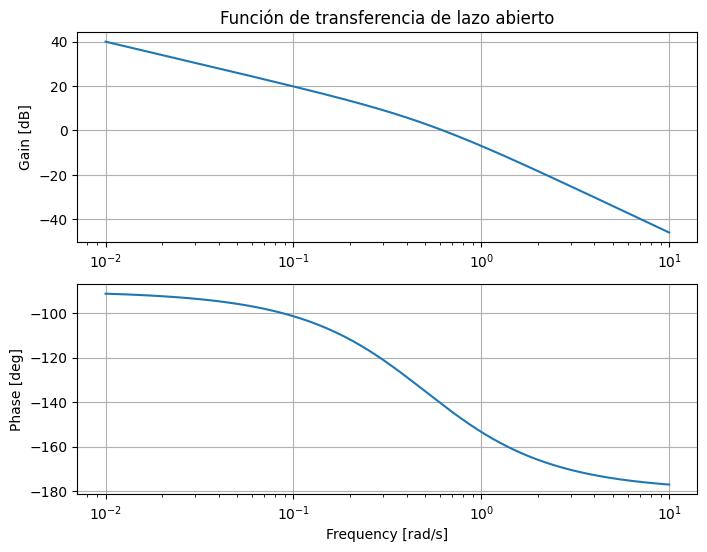

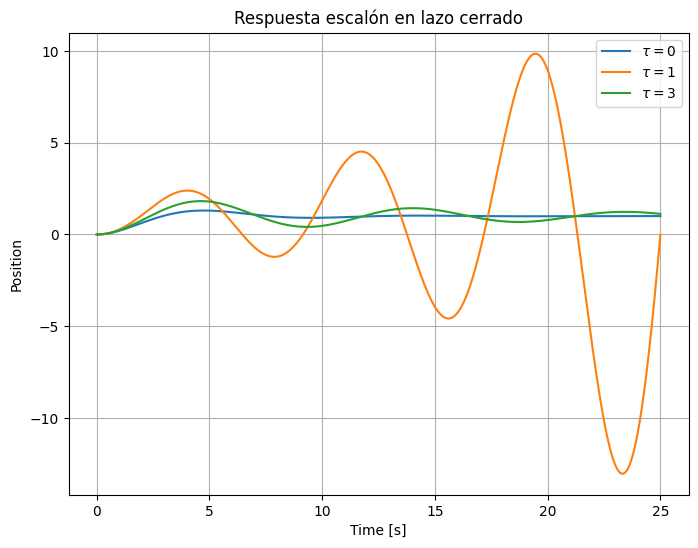

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parámetros del sistema
kI = 1  # Constante de ganancia integradora
J = 2   # Inercia
c = 1   # Coeficiente de fricción

# Parámetros del controlador
kp = 1  # Ganancia proporcional
taus = [0, 1, 3]  # Valores de tau

# Función de transferencia del sistema
P_motor = ctrl.TransferFunction([kI], [J, c, 0])  # kI/(Js + c)

# Función para graficar la transferencia del lazo abierto (Bode)
def plot_bode():
    mag, phase, omega = ctrl.bode(P_motor * kp, dB=True, deg=True, omega=np.logspace(-2, 1, 500), plot=False)
    plt.figure(figsize=(8, 6))

    # Gráfica de magnitud
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, 20 * np.log10(mag))
    plt.title('Función de transferencia de lazo abierto')
    plt.ylabel('Gain [dB]')
    plt.grid(True)

    # Gráfica de fase
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, np.degrees(phase))
    plt.ylabel('Phase [deg]')
    plt.xlabel('Frequency [rad/s]')
    plt.grid(True)
    plt.show()

# Graficar la respuesta al escalón con diferentes valores de t
def plot_step_responses():
    t = np.linspace(0, 25, 1000)  # Tiempo de simulación
    plt.figure(figsize=(8, 6))

    for tau in taus:
        if tau == 0:
            C = kp  # Solo ganancia proporcional
        else:
            C = kp * ctrl.TransferFunction([tau, 1], [tau, 0])  # PD Controller

        # Sistema en lazo cerrado
        T_closed = ctrl.feedback(C * P_motor, 1)
        t, y = ctrl.step_response(T_closed, t)
        plt.plot(t, y, label=f'$\\tau = {tau}$')

    plt.title('Respuesta escalón en lazo cerrado')
    plt.xlabel('Time [s]')
    plt.ylabel('Position')
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejecutar las gráficas
plot_bode()
plot_step_responses()
